#### Imports

In [419]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Retrieve Stored Pre-Processed Dataset

In [420]:
%store -r data

#### Correlation Matrix with Heatmap

##### Pearson Correlation

C:\Users\mitch\AppData\Local\Temp\ipykernel_14092\980550380.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),  annot=True)


<AxesSubplot: >

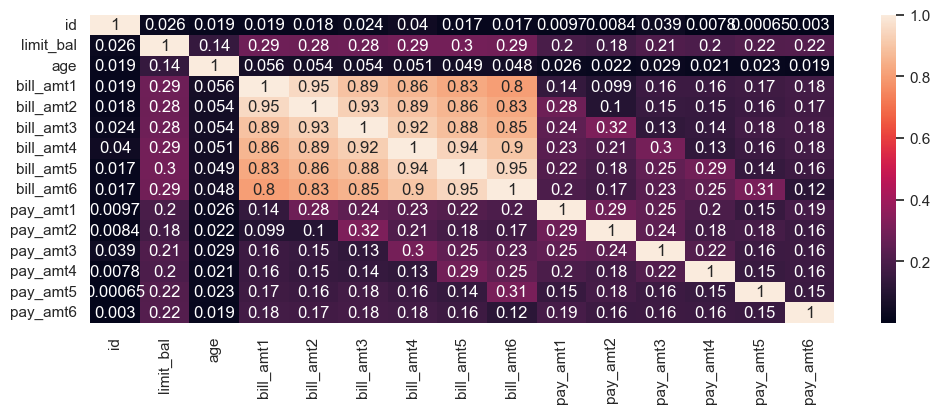

In [421]:
sns.set(rc={"figure.figsize":(12, 4)})
sns.heatmap(data.corr(),  annot=True)

##### Spearman Correlation

C:\Users\mitch\AppData\Local\Temp\ipykernel_14092\2641553540.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='spearman'),  annot=True)


<AxesSubplot: >

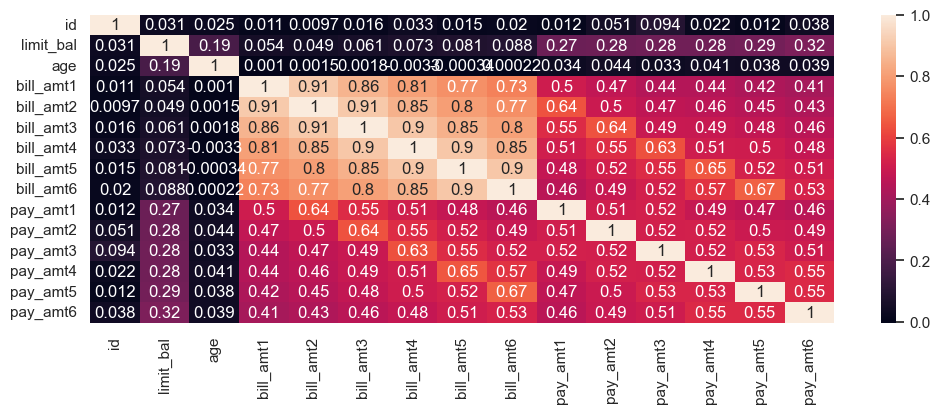

In [422]:
sns.set(rc={"figure.figsize":(12, 4)})
sns.heatmap(data.corr(method='spearman'),  annot=True)

#### Variance of Attributes

In [423]:
data.var()

C:\Users\mitch\AppData\Local\Temp\ipykernel_14092\445316826.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.var()


id           7.500250e+07
limit_bal    1.683446e+10
age          8.496976e+01
bill_amt1    5.422240e+09
bill_amt2    5.065705e+09
bill_amt3    4.809338e+09
bill_amt4    4.138716e+09
bill_amt5    3.696294e+09
bill_amt6    3.546692e+09
pay_amt1     2.743423e+08
pay_amt2     5.308817e+08
pay_amt3     3.100051e+08
pay_amt4     2.454286e+08
pay_amt5     2.334266e+08
pay_amt6     3.160383e+08
dtype: float64

#### Boxplot of Attributes

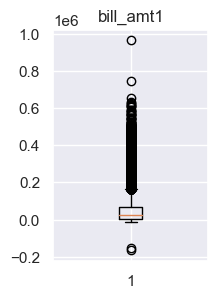

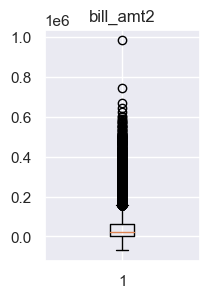

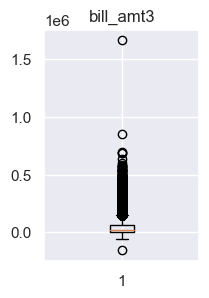

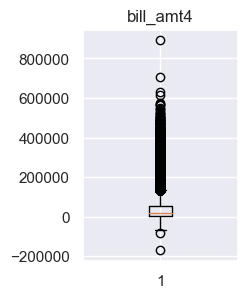

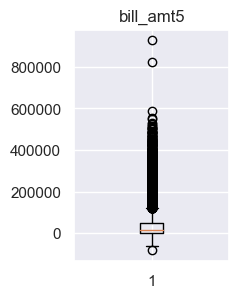

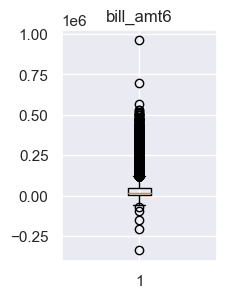

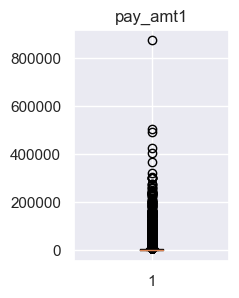

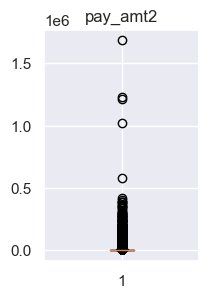

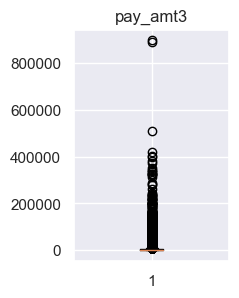

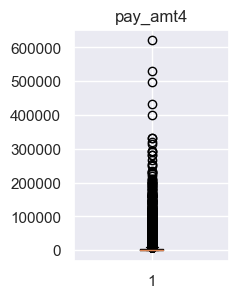

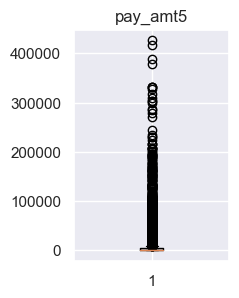

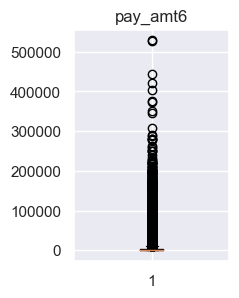

In [424]:
sns.set(rc={"figure.figsize":(2,3)})
for col in data.columns:
    if str(col).startswith('bill') or str(col).startswith('pay_a'):
        plt.boxplot(data[col])
        plt.title(col)
        plt.show()

#### Distribution of Attributes

##### Distributions for bill and pay amount are unusable due to extreme distributions

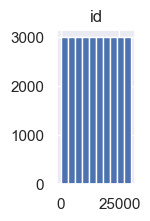

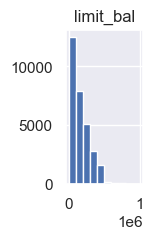

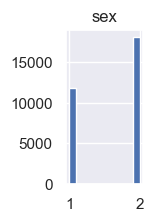

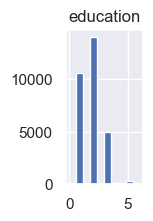

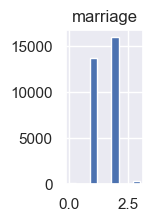

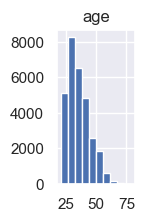

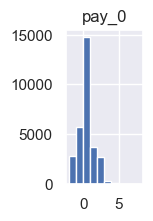

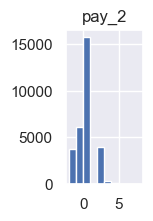

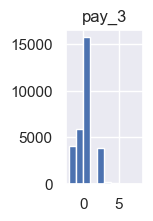

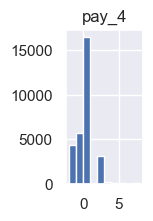

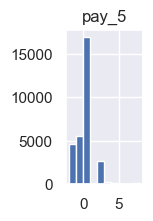

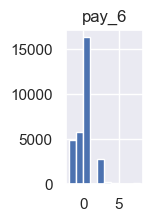

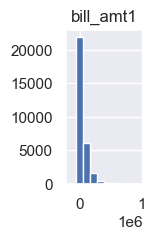

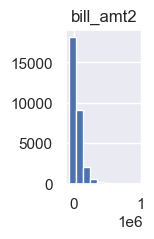

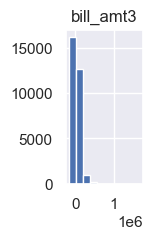

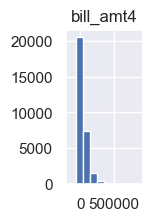

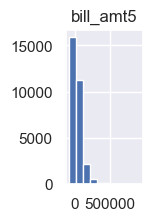

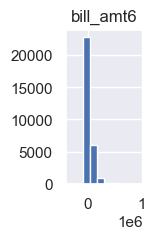

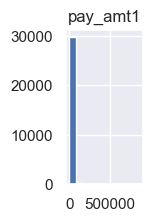

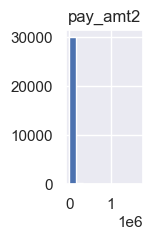

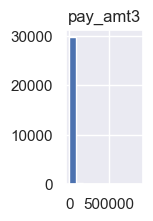

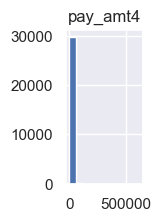

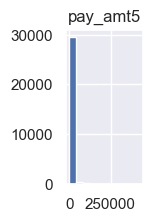

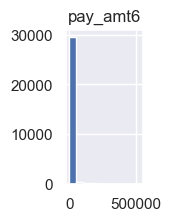

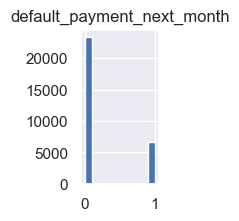

In [425]:
sns.set(rc={"figure.figsize":(1,2)})
for col in data.columns:
    plt.hist(data[col])
    plt.title(col)
    plt.show()

#### Example of a Single Observation Behaviour to Explain Next Steps

##### Person paid $689 bill_amt3 (July 2005) with full payment in pay_amt2 (Aug 2005)

In [426]:
data.iloc[3]

id                                4
limit_bal                     50000
sex                               2
education                         2
marriage                          1
age                              37
pay_0                             0
pay_2                             0
pay_3                             0
pay_4                             0
pay_5                             0
pay_6                             0
bill_amt1                     46990
bill_amt2                     48233
bill_amt3                     49291
bill_amt4                     28314
bill_amt5                     28959
bill_amt6                     29547
pay_amt1                       2000
pay_amt2                       2019
pay_amt3                       1200
pay_amt4                       1100
pay_amt5                       1069
pay_amt6                       1000
default_payment_next_month        0
Name: 3, dtype: int64

#### Option 1: Create Payment Ratio For Each Period as Pseduo-Standardization

##### i.e. Bill 1 / Payment 2

In [427]:
data_ratio = data.copy()

In [428]:
for i in range(1,7):
    try:
        data_ratio['pay_ratio' + str(i)] = data_ratio['pay_amt' + str(i)] / data_ratio['bill_amt' + str(i+1)]
    except:
        continue

In [429]:
data_ratio.iloc[10]

id                                11.000000
limit_bal                     200000.000000
sex                                2.000000
education                          3.000000
marriage                           2.000000
age                               34.000000
pay_0                              0.000000
pay_2                              0.000000
pay_3                              2.000000
pay_4                              0.000000
pay_5                              0.000000
pay_6                             -1.000000
bill_amt1                      11073.000000
bill_amt2                       9787.000000
bill_amt3                       5535.000000
bill_amt4                       2513.000000
bill_amt5                       1828.000000
bill_amt6                       3731.000000
pay_amt1                        2306.000000
pay_amt2                          12.000000
pay_amt3                          50.000000
pay_amt4                         300.000000
pay_amt5                        

#### Infinite Values Mean Advance Payment, Less than 65 Records, Drop These

In [430]:
data_ratio.isin([np.inf]).sum()

id                             0
limit_bal                      0
sex                            0
education                      0
marriage                       0
age                            0
pay_0                          0
pay_2                          0
pay_3                          0
pay_4                          0
pay_5                          0
pay_6                          0
bill_amt1                      0
bill_amt2                      0
bill_amt3                      0
bill_amt4                      0
bill_amt5                      0
bill_amt6                      0
pay_amt1                       0
pay_amt2                       0
pay_amt3                       0
pay_amt4                       0
pay_amt5                       0
pay_amt6                       0
default_payment_next_month     0
pay_ratio1                    38
pay_ratio2                    56
pay_ratio3                    45
pay_ratio4                    57
pay_ratio5                    61
dtype: int

In [431]:
data_ratio.drop(data_ratio[np.isinf(data_ratio[[c for c in data_ratio.columns if c.startswith('pay_ratio')]]).any(1)].index, inplace=True)

C:\Users\mitch\AppData\Local\Temp\ipykernel_14092\2332744901.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  data_ratio.drop(data_ratio[np.isinf(data_ratio[[c for c in data_ratio.columns if c.startswith('pay_ratio')]]).any(1)].index, inplace=True)


#### Records Successfully Dropped

In [432]:
len(data_ratio.index)

29754

#### Distribution of New Variables

In [433]:
data_ratio.describe()[[c for c in data_ratio.describe().columns if c.startswith('pay_ratio')]]

,pay_ratio1,pay_ratio2,pay_ratio3,pay_ratio4,pay_ratio5
count,27311.000000,26976.000000,26667.000000,26376.000000,25897.000000
mean,0.465663,0.677065,-2.712102,-0.144230,0.357282
std,27.224065,40.926677,503.933345,39.669329,3.629233
min,-497.800000,-384.615385,-82150.000000,-4306.666667,-185.333333
25%,0.041506,0.041047,0.035806,0.035449,0.036325
50%,0.074424,0.073610,0.058059,0.049620,0.052870
75%,0.978607,1.000000,0.770470,0.637003,0.968095
max,4444.333333,5001.000000,4444.333333,68.027211,447.735395


#### Option 2: Factorize Bill and Payment Amounts

In [434]:
data_levels = data.copy()

##### Factorize Bill Payment Attributes

Establish Levels

In [435]:
bill_levels = {
    1: 0,
    2: 10000,
    3: 50000,
    4: 10000000000
}

Define function to Assign Levels

In [436]:
def containerize(num, levels):
        for level in levels:
            if num <= levels[level]:
                return level

Test Function

In [437]:
[containerize(i, bill_levels) for i in [10, 40000,0, -30, 56000, 21000]]

[2, 3, 1, 1, 4, 3]

Overwrite bill_amt Columns in DataFrame

In [438]:
for i in range(1,7):
    data_levels['bill_amt' + str(i)] = [containerize(i, bill_levels) for i in data_levels['bill_amt' + str(i)]]

##### Example of New Distribution of Bill Variable

In [439]:
data_levels.bill_amt1.value_counts()

3    9639
4    9506
2    8257
1    2598
Name: bill_amt1, dtype: int64

#### Factorize Pay Variables using the Same Process

Establish Levels

In [440]:
pay_levels = {
    1: 0,
    2: 1000,
    3: 5000,
    4: 10000000000
}

Overwrite pay_amt Columns in dataset (reuse containerize function)

In [441]:
for i in range(1,7):
    data_levels['pay_amt' + str(i)] = [containerize(i, pay_levels) for i in data_levels['pay_amt' + str(i)]]

In [442]:
data_levels.pay_amt1.value_counts()

3    14597
4     7564
1     5249
2     2590
Name: pay_amt1, dtype: int64

#### Rerun Correlation on Factored Variables

C:\Users\mitch\AppData\Local\Temp\ipykernel_14092\3986082389.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_levels.corr(method='spearman'),  annot=True)


<AxesSubplot: >

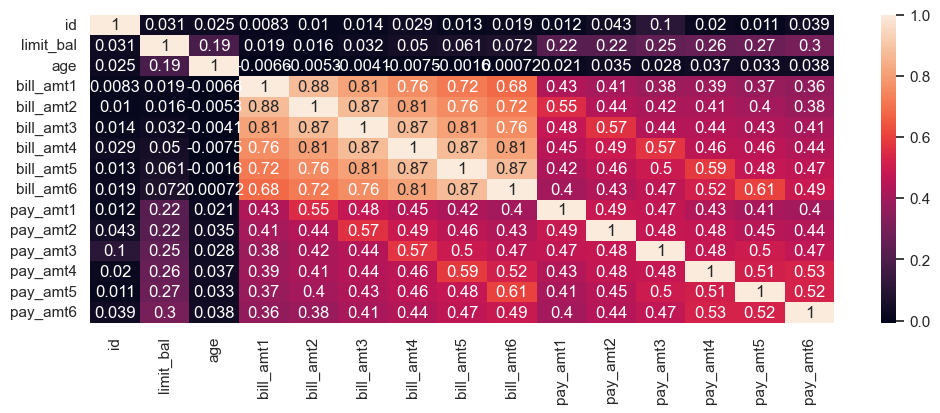

In [443]:
sns.set(rc={"figure.figsize":(12, 4)})
sns.heatmap(data_levels.corr(method='spearman'),  annot=True)

In [444]:
%store data_levels

Stored 'data_levels' (DataFrame)
